# Setup

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.document_loaders import TextLoader
import yaml
import os

In [ ]:
with open('config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)
os.environ['OPENAI_API_KEY'] = config['OPENAI_API_KEY']

In [ ]:
openai = ChatOpenAI(model_name='gpt-4o', temperature=0)

# SequentialChain

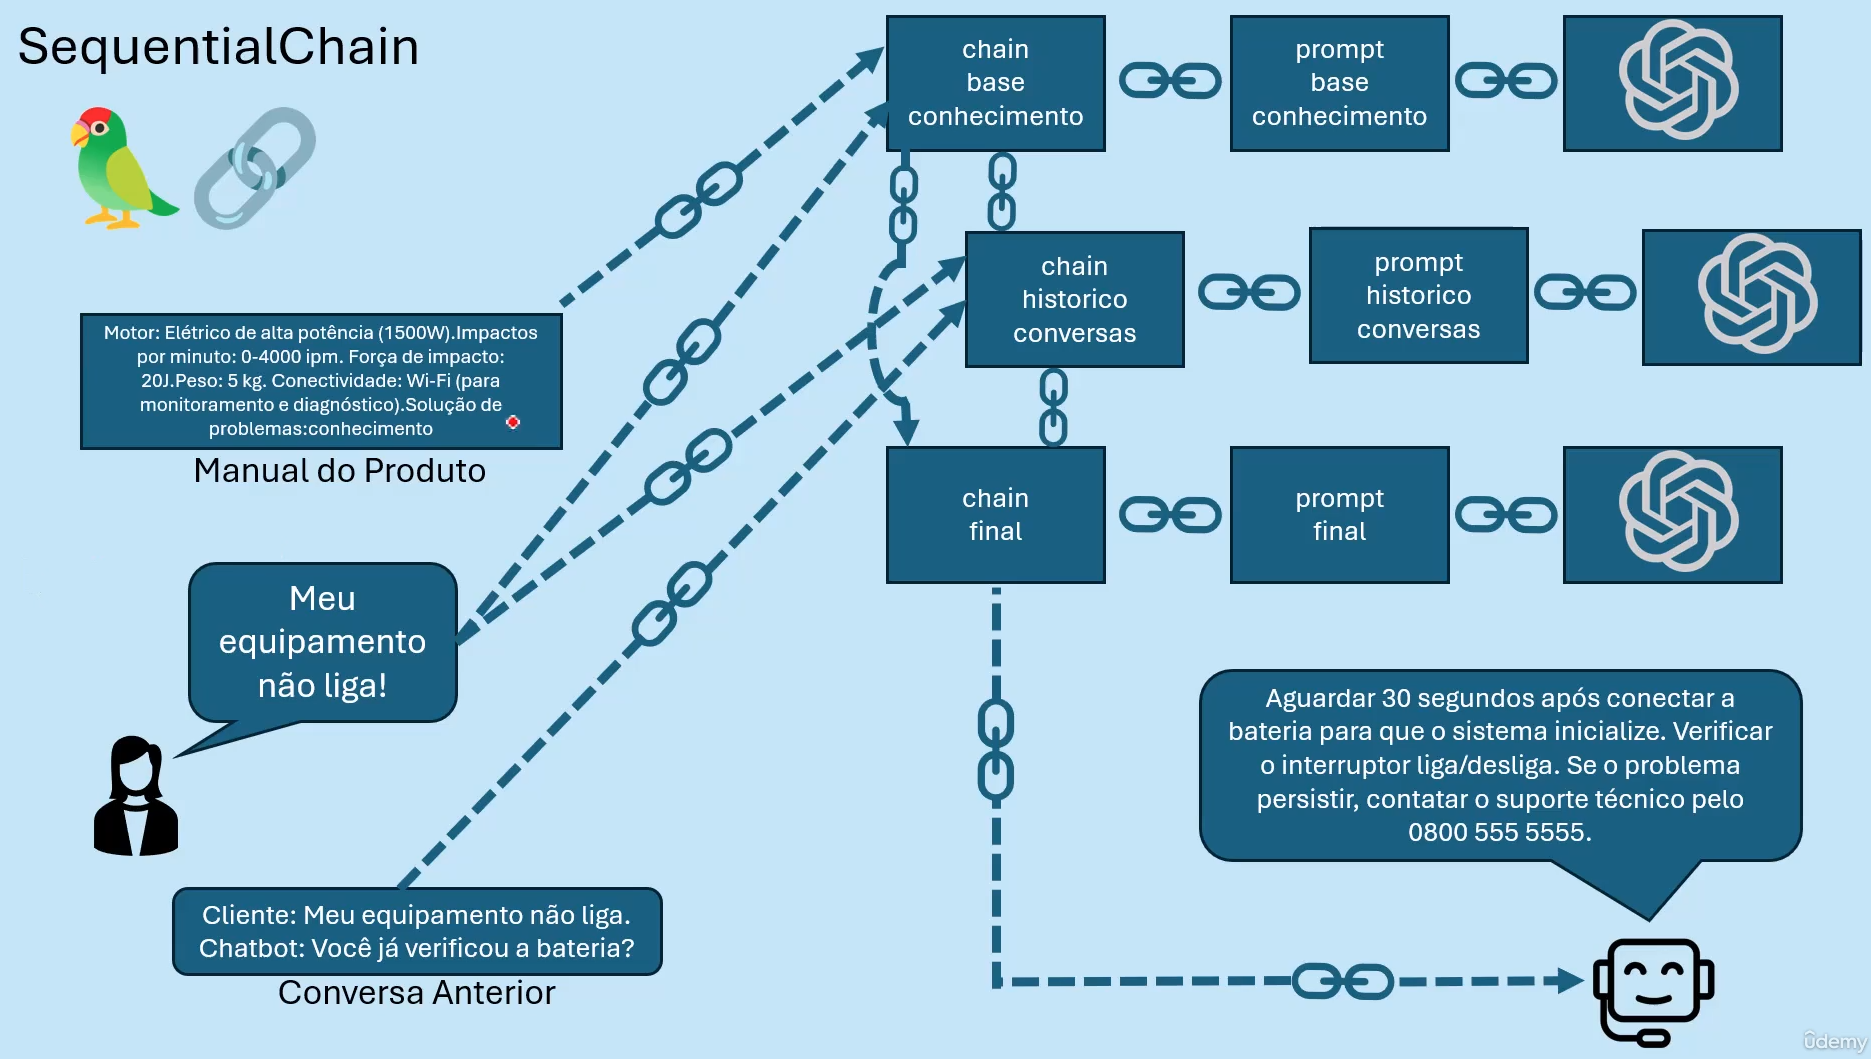

In [ ]:
# Carregar os documentos
loader = TextLoader('base_conhecimento_britadeira.txt')
documents = loader.load()
# Carregar histórico de conversas 
historico_conversas = """Cliente: Minha britadeira não liga. Chatbot: Você já verificou 
                         se a bateria está carregada e conectada corretamente?"""
# Pergunta do cliente
pergunta = "Minha britadeira não liga. Eu já veriquei e a bateria está carregada e conectada corretamente"

In [ ]:
inputs = {
    "context": "\n".join(doc.page_content for doc in documents),
    "question": pergunta,
    "historico": historico_conversas
}

In [ ]:
prompt_base_conhecimento = PromptTemplate(
    input_variables=["context", "question"],
    template="""Use o seguinte contexto para responder à pergunta. 
    Responda apenas com base nas informações fornecidas.
    Não forneceça instruções de procedimento já realizados.
    Não utilize informações externas ao contexto:
    Contexto: {context}
    Pergunta: {question}"""
)
prompt_historico_conversas = PromptTemplate(
    input_variables=["historico", "question"],
    template="""Use o histórico de conversas para responder à pergunta. 
    Responda apenas com base nas informações fornecidas. 
    Não forneceça instruções de procedimento já realizados.
    Não utilize informações externas ao contexto:
    Histórico: {historico}
    Pergunta: {question}"""
)
prompt_final = PromptTemplate(
    input_variables=["resposta_base_conhecimento", "resposta_historico_conversas"],
    template="""Combine as seguintes respostas para gerar uma resposta final,
    mas não forneça instruções de procedimentos já realizados:
    Resposta da base de conhecimento: {resposta_base_conhecimento}
    Resposta do histórico de conversas: {resposta_historico_conversas}"""
)

In [ ]:
print(prompt_base_conhecimento)

In [ ]:
# Definir as cadeias  
chain_base_conhecimento = prompt_base_conhecimento | openai
chain_historico_conversas = prompt_historico_conversas | openai
chain_final = prompt_final | openai

In [ ]:
print(chain_base_conhecimento)

In [ ]:
print(chain_historico_conversas)

In [ ]:
# Passando dados e executando
resultado_base_conhecimento = chain_base_conhecimento.invoke({"context": inputs["context"], "question": inputs["question"]})
resultado_historico_conversas = chain_historico_conversas.invoke({"historico": inputs["historico"], "question": inputs["question"]})
resultado_final = chain_final.invoke({"resposta_base_conhecimento": resultado_base_conhecimento, 
                                      "resposta_historico_conversas": resultado_historico_conversas})

In [ ]:
print("Resultado Base de Conhecimento:\n", resultado_base_conhecimento)
print("----")
print("Resultado Histórico de Conversas:\n", resultado_historico_conversas)

In [ ]:
print(resultado_final.content)

In [ ]:
print(resultado_final)